### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names,)

In [113]:
#preview of dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [114]:
#no:of rows and cols in dataset
df.shape

(506, 13)

In [115]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [116]:
df['Price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [117]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [118]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [119]:
#checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

There are no null values in the given data set

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In the dataset we don't have any categorical variables

In [121]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Distribution of a price

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


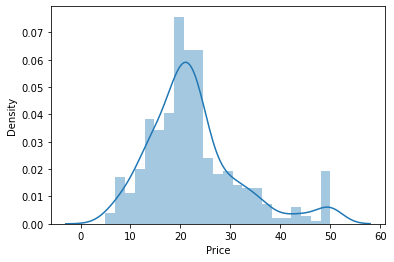

In [122]:
f=sns.distplot(df['Price'])

## Correlation

<AxesSubplot:>

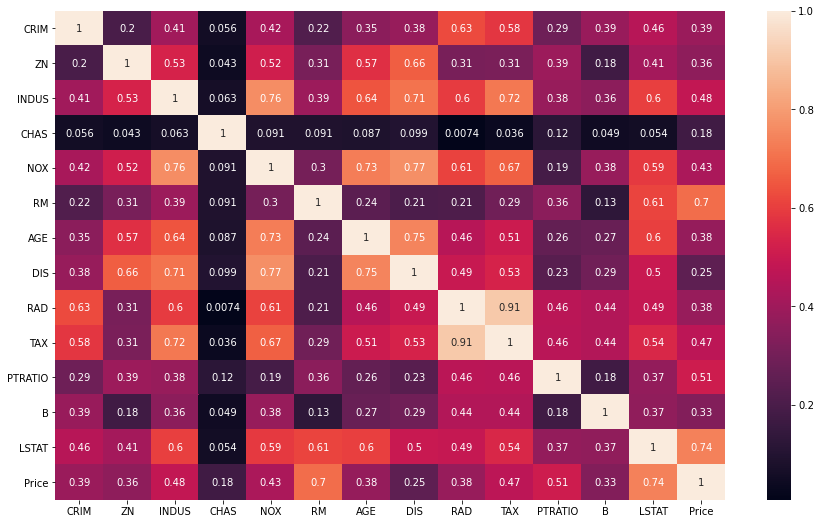

In [123]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr().abs(),annot=True)

In [124]:
#spliting the dataset into dependent and independent features
features=df.drop(['Price'],axis=1)
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [125]:
target=df['Price']

## Distribution of features

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


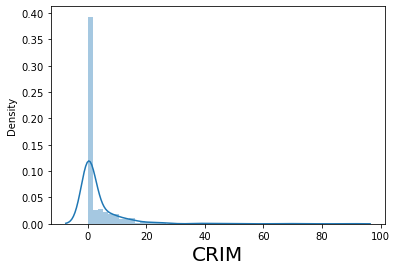

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


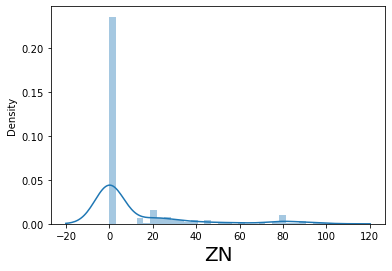

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


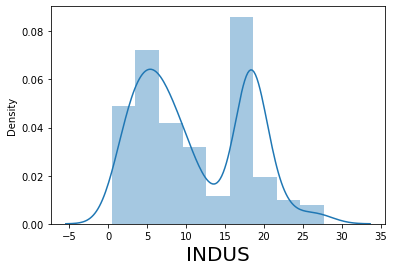

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


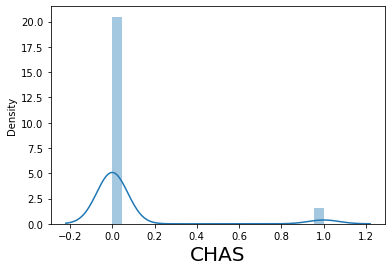

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


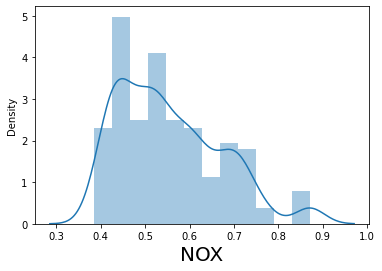

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


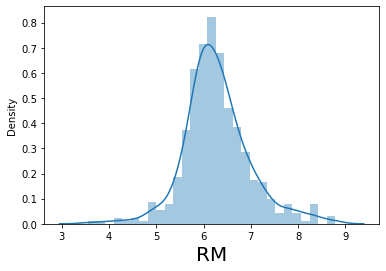

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


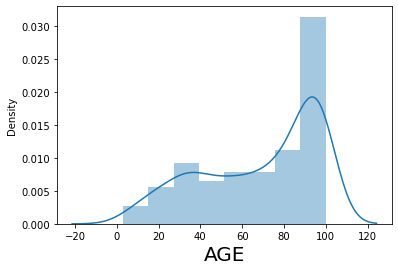

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


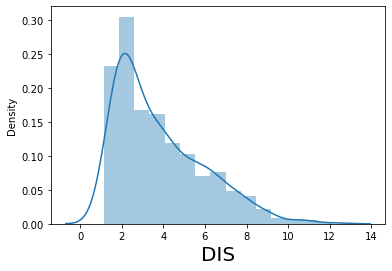

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


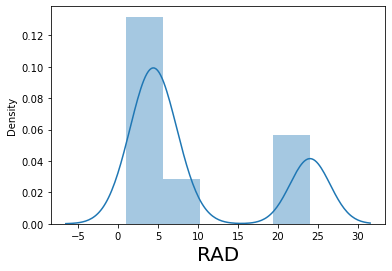

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


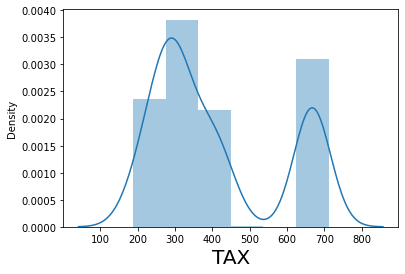

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


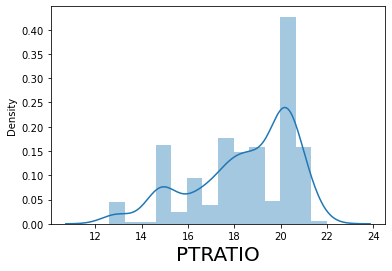

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


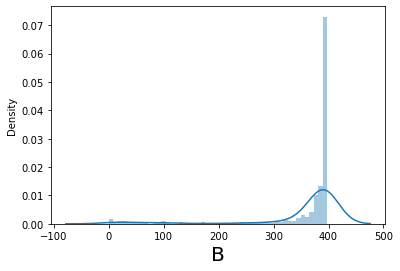

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


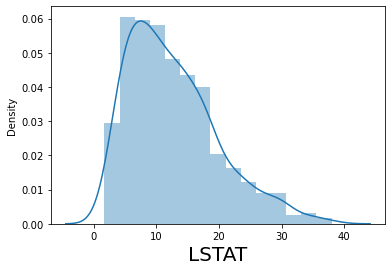

In [126]:
for column in features:
    sns.distplot(features[column])
    plt.xlabel(column,fontsize=20)
    plt.show()

## Finding Outliers

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


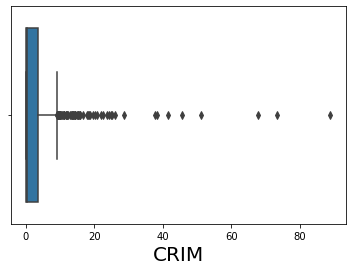

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


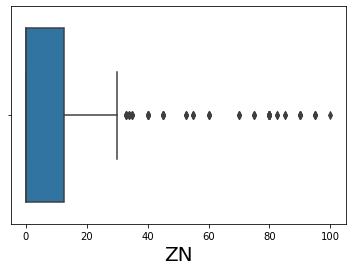

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


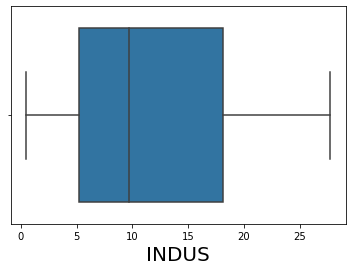

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


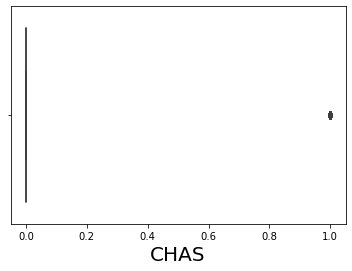

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


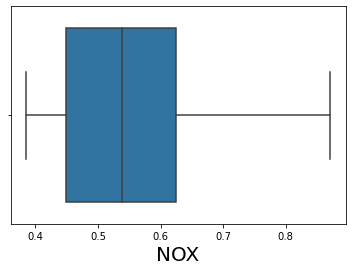

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


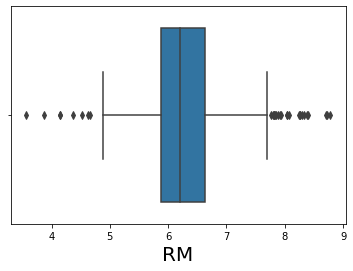

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


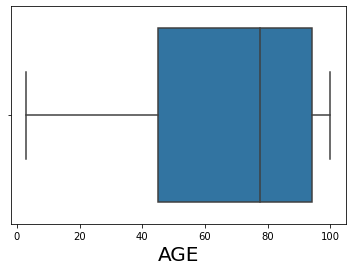

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


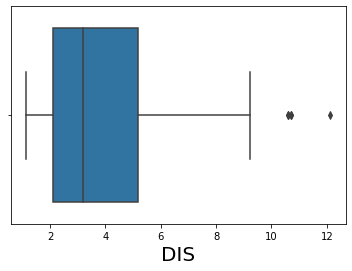

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


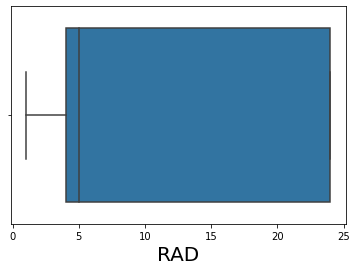

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


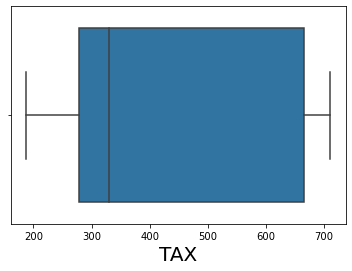

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


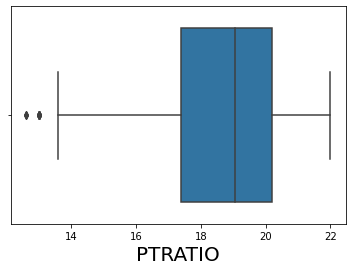

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


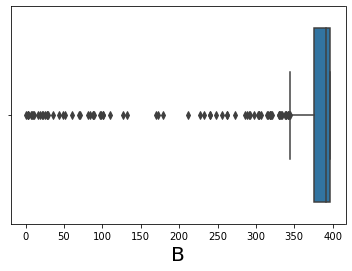

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


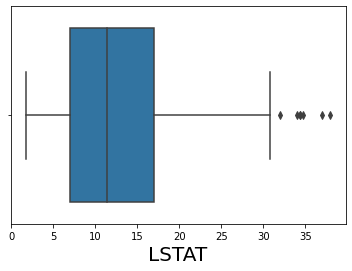

In [127]:
for column in features:
    sns.boxplot(features[column])
    plt.xlabel(column,fontsize=20)
    plt.show()

from above visualization we can conclude that CRIM,ZN,CHAS,RM,PTRATIO,B,LSTAT have outliers

## Scatterplot

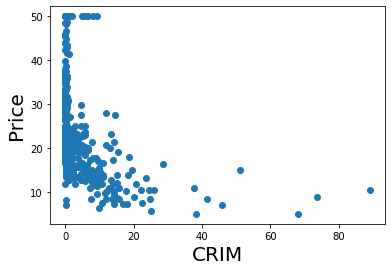

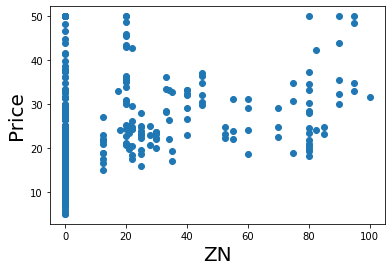

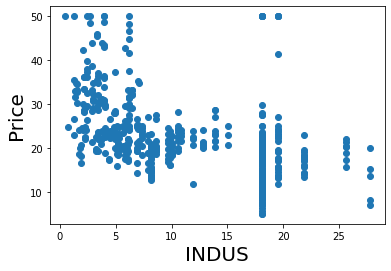

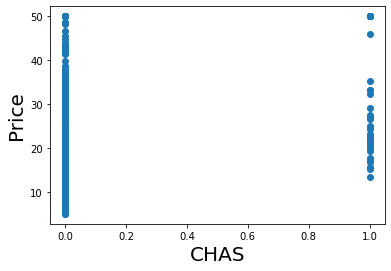

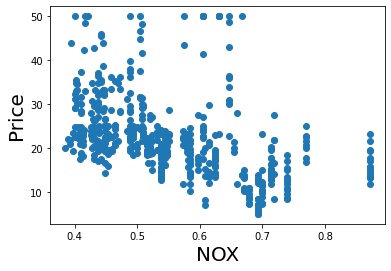

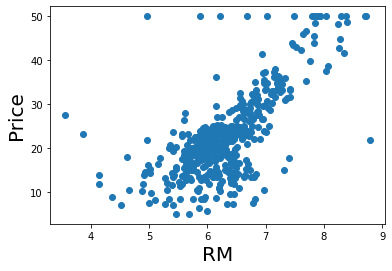

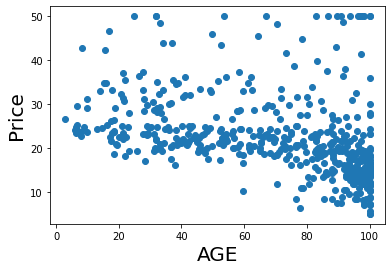

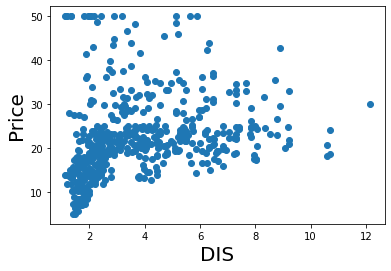

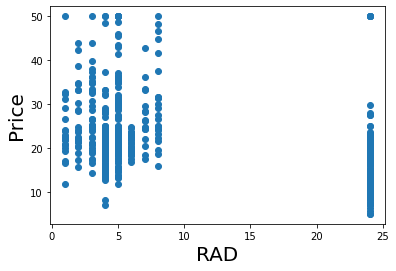

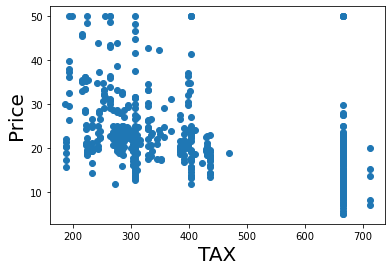

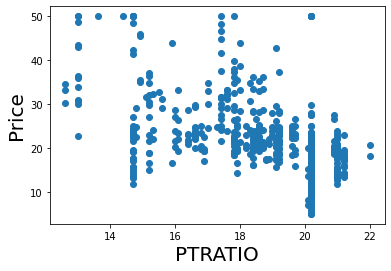

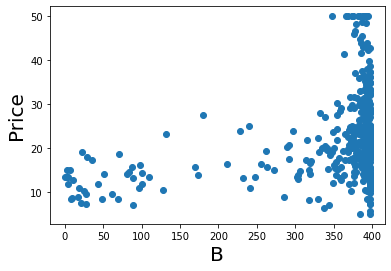

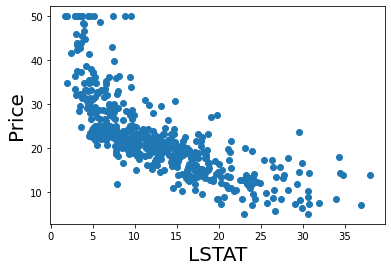

In [129]:
for column in features:
    plt.scatter(features[column],df['Price'])
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Price",fontsize=20)
    plt.show()

In [130]:
#droping tax column
x=features.drop(["RAD"],axis=1)
y=target

In [131]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [132]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

So,if we observe that there are skewness of the data therefore we perform logtransformation

In [133]:
#log_transformation
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

## Standard scaling

In [134]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(x)
scaled_boston=pd.DataFrame(scaling.transform(x),columns=x.columns)

In [135]:
scaled_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.789960,1.229330,-1.287909,-0.272599,-0.111204,0.453447,0.136758,0.357474,-0.609011,-1.445535,0.311086,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,-0.741058,0.240390,0.456001,0.742438,-1.117107,-0.234324,0.311086,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,-0.741058,1.256834,0.028245,0.742438,-1.117107,-0.234324,0.296977,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.844197,1.017096,-0.451842,1.150436,-1.334579,0.162604,0.303235,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,-0.844197,1.208564,-0.171661,1.150436,-1.334579,0.162604,0.311086,-1.170492


## multicollinearity using VIF

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = scaled_boston
vif = pd.DataFrame()
vif["variables"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,variables,VIF
0,CRIM,4.293788
1,ZN,2.330278
2,INDUS,3.754824
3,CHAS,1.064279
4,NOX,5.081860
5,RM,1.930978
6,AGE,2.379132
7,DIS,4.983508
8,TAX,3.954682
9,PTRATIO,1.767363


Here,we can observe that RAD and TAX columns are highly corelated so we will drop our Tax column from data

In [137]:
x_scaled=scaled_boston
#data after removing the tax column
x_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.789960,1.229330,-1.287909,-0.272599,-0.111204,0.453447,0.136758,0.357474,-0.609011,-1.445535,0.311086,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,-0.741058,0.240390,0.456001,0.742438,-1.117107,-0.234324,0.311086,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,-0.741058,1.256834,0.028245,0.742438,-1.117107,-0.234324,0.296977,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.844197,1.017096,-0.451842,1.150436,-1.334579,0.162604,0.303235,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,-0.844197,1.208564,-0.171661,1.150436,-1.334579,0.162604,0.311086,-1.170492


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=45)
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
191,-0.730720,1.775393,-1.123032,-0.272599,-1.043276,0.675627,-1.107685,1.289545,0.138507,-1.497771,0.286062,-1.368431
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.844197,1.017096,-0.451842,1.150436,-1.334579,0.162604,0.303235,-2.050937
275,-0.706372,1.704329,-0.689681,-0.272599,-0.948116,0.828634,-0.564283,0.440383,-0.995060,-0.325109,0.311086,-2.032179
386,2.369618,-0.589091,1.015999,-0.272599,1.262994,-2.584224,0.853741,-1.396100,1.439516,0.785497,0.311086,1.673715
146,0.328452,-0.589091,1.231945,-0.272599,2.578179,-0.931870,0.853741,-1.348096,0.170039,-1.763884,-0.853744,0.733753


In [139]:
# model-bulding
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [140]:
regr.coef_

array([-0.08720463, -0.00105691, -0.01623953,  0.02024378, -0.05541536,
        0.04506301,  0.02683993, -0.09416273,  0.00762373, -0.05247272,
        0.03135211, -0.22749431])

In [141]:
#prediction of data
regr.predict(scaling.transform([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14]]))

array([15.14981719])

In [142]:
#R-square value for training data-set
regr.score(x_train, y_train)

0.7728930839113071

In [143]:
#R-square value for test data-set
regr.score(x_test, y_test)

0.7798969823115302

In [144]:
def adj_r2(x,y):
    r2 = regr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [145]:
#adjusted-R-square value for training data-set
adj_r2(x_train, y_train)

0.7649010516735818

In [146]:
#adjusted-R-square value for test data-set
adj_r2(x_test, y_test)

0.7608952829427413

## LASSO-Regression

In [147]:
from sklearn.linear_model import LassoCV,Lasso
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
l1 = LassoCV(alphas = None,cv =10, max_iter = 10000, normalize = True)
l1.fit(x_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [148]:
alpha=l1.alpha_
alpha

0.00011484039401122135

In [149]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00011484039401122135)

In [150]:
#R-square value for test data-set
lasso_reg.score(x_test, y_test)

0.7799079633508034

In [151]:
#R-square value for training data-set
lasso_reg.score(x_train, y_train)

0.77288918696545

In [152]:
#adjusted-R-square value for training data-set
print(adj_r2(x_train, y_train))
#adjusted-R-square value for test data-set
print(adj_r2(x_test, y_test))

0.7649010516735818
0.7608952829427413


## Ridge Regression

In [165]:
from sklearn.linear_model import RidgeCV,Ridge

In [166]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.95647123, 6.64114888, 2.37158917, 2.66639429, 9.97414147,
       0.92363336, 8.18000352, 5.68549487, 5.66609101, 6.63539167,
       2.81565724, 1.21267793, 3.19245489, 0.95864662, 5.00392694,
       5.63292534, 4.7491199 , 7.31385073, 5.10978465, 3.27645905,
       4.36358345, 0.13532387, 6.8988701 , 9.67503472, 8.55266144,
       1.20775798, 4.30196225, 2.69832337, 1.14556486, 3.24480129,
       4.18376212, 6.29771277, 6.25169015, 4.58375642, 7.61276517,
       8.62432409, 5.24829948, 8.33616852, 7.81565695, 0.63745677,
       7.5044524 , 5.1050917 , 0.03277352, 5.04943931, 5.37294196,
       3.24450017, 8.84185319, 2.7841118 , 5.11453239, 7.33205703]),
        cv=10, normalize=True)

In [167]:
ridgecv.alpha_

0.03277351928245631

In [168]:
l2= Ridge(alpha=ridgecv.alpha_)
l2.fit(x_train, y_train)

Ridge(alpha=0.03277351928245631)

In [169]:
l2.score(x_train,y_train)

0.7728930702708698

In [170]:
l2.score(x_test, y_test)

0.7798943855757774

In [171]:
#adjusted-R-square value for training data-set
print(adj_r2(x_train, y_train))
#adjusted-R-square value for test data-set
print(adj_r2(x_test, y_test))

0.7649010516735818
0.7608952829427413


## Elastic-Net

In [172]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [173]:
elasticCV.alpha_

0.003995274044784357

In [174]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [175]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.003995274044784357)

In [176]:
elasticnet_reg.score(x_test, y_test)

0.7791354181216833

In [177]:
elasticnet_reg.score(x_train, y_train)

0.7722198181647949

In [178]:
#adjusted-R-square value for training data-set
print(adj_r2(x_train, y_train))
#adjusted-R-square value for test data-set
print(adj_r2(x_test, y_test))

0.7649010516735818
0.7608952829427413


## Conclusion

For this given data-set logistic-regression,l1-norm,l2-norm,Elasticnet all are giving same accuracy so we can use any one of the model to predict the price of boston_house.